Steepest Decent 和 Newton's Method是两个优化算法

* Line Search Algorithm的基本思想是，对于某个函数，在某一点x_k重，如果提督f'(x_k) != 0，则可以构造一条射线x_k + ap_k，然后在这条射线上寻找合适的步长a，使得函数值下降

关注:
* Decent Direction 梯度下降方向
* Step Length Selection 步长选择

Wolfe Condition: 一种Step Length Selection策略，包含2个条件：
* Sufficient Decrease Condition, Armijo Condition
    * 要求函数值的下降幅度至少和步长线性相关
* Curvature Condition
    * 只有Sufficient Decrease Condition可能导致步长过小，影响优化速度。

Different Curvature Conditions:
* Strong Curvature Condition -> Strong Wolfe Condition
* Curvature Condition -> Wolfe Condition


Backtracking Linesearch
* directly apply sufficient decrease condition, no checking curvature condition
* Step Direction Selection Algoeirhms:
    * First-order Taylor Expansion -> Steepest Decent
    * Second-order Taylor Expansion -> Newton's Method

Steepest Decent's limitation:
* 当一阶线性模型没有下界的时候，p随着梯度递减，无法求得最优步长方向；此时直接取最速下降的方向


Newton's Method's limitation:
* Hessian is not positive definite





Testing function: f1
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [9.81063234 3.89458492], Time: 0.03954 sec
Newton Method | Iterations: 2, Rho: 0.9, Final x: [0. 0.], Time: 0.00028 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [9.8063952  6.18726348], Time: 0.00556 sec
Newton Method | Iterations: 2, Rho: 0.5, Final x: [0. 0.], Time: 0.00015 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [9.85515288e+00 4.06120376e-03], Time: 0.00500 sec
Newton Method | Iterations: 2, Rho: 0.3, Final x: [0. 0.], Time: 0.00015 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [9.98001799 1.07374182], Time: 0.00277 sec
Newton Method | Iterations: 2, Rho: 0.1, Final x: [0. 0.], Time: 0.00016 sec


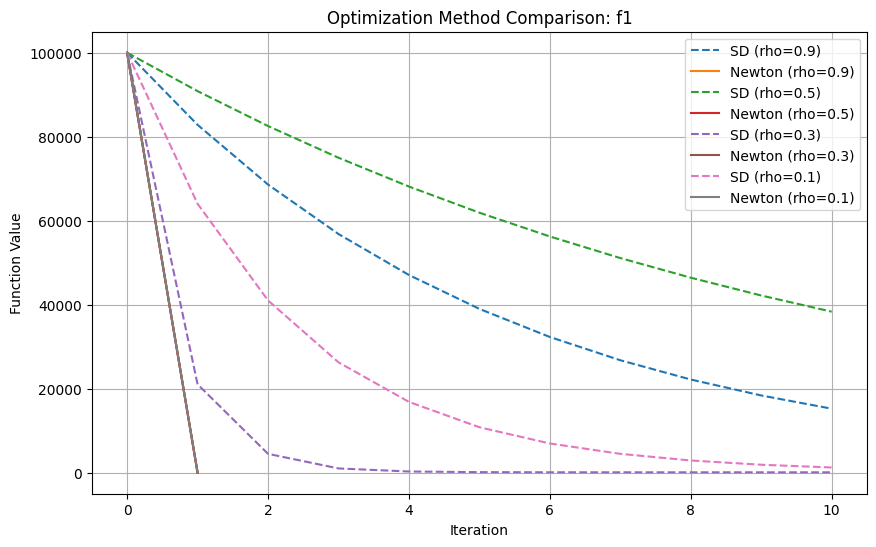

Testing function: f2
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [1.44785509 2.02225547], Time: 0.00544 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [0.47131197 0.1729609 ], Time: 0.00072 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [-1.01781085  1.03713659], Time: 0.00094 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [0.37974282 0.1181458 ], Time: 0.00034 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [-1.0195126   1.04227576], Time: 0.00062 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [0.31247395 0.07831726], Time: 0.00033 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [-0.84492637  0.72282178], Time: 0.00042 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [-0.06162324 -0.00663252], Time: 0.00033 sec


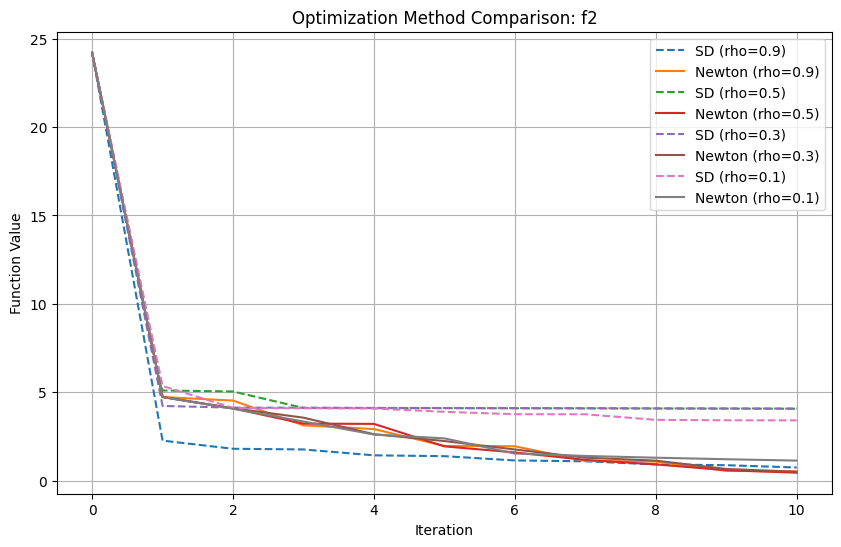

Testing function: f3
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [0.98105873 0.38039081], Time: 0.00738 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [1. 1.], Time: 0.22344 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [0.98133485 0.00250211], Time: 0.00588 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [1. 1.], Time: 0.03313 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [ 9.83030790e-01 -6.30795769e-04], Time: 0.00366 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [1. 1.], Time: 0.01996 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.99037766 0.00350076], Time: 0.00236 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [1. 1.], Time: 0.01111 sec


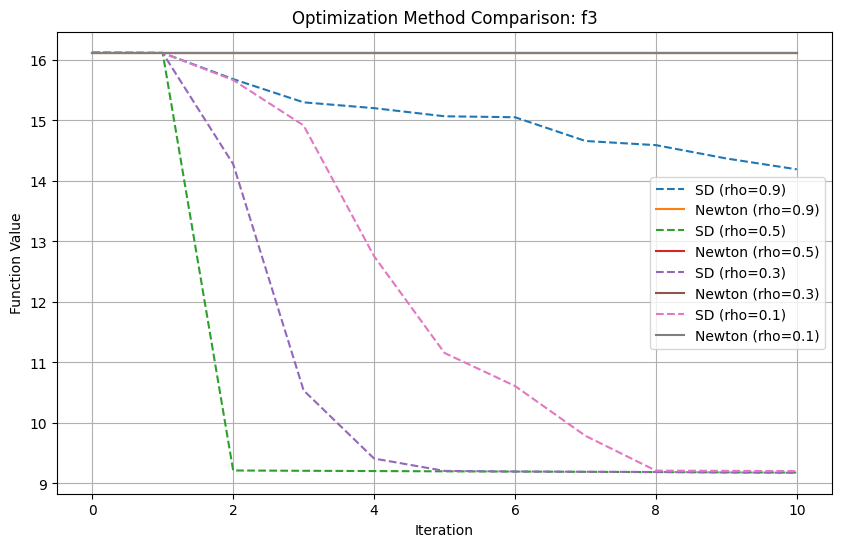

Testing function: f4
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [-0.01414119 -0.14952464], Time: 0.01801 sec
Newton Method | Iterations: 8, Rho: 0.9, Final x: [0.00190933 0.00190933], Time: 0.00192 sec
Steepest Descent | Iterations: 9, Rho: 0.5, Final x: [0.00190938 0.00190938], Time: 0.00361 sec
Newton Method | Iterations: 8, Rho: 0.5, Final x: [0.00190933 0.00190933], Time: 0.00192 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [0.00320022 0.00231638], Time: 0.00283 sec
Newton Method | Iterations: 8, Rho: 0.3, Final x: [0.00190933 0.00190933], Time: 0.00189 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.26306675 0.26843546], Time: 0.00269 sec
Newton Method | Iterations: 8, Rho: 0.1, Final x: [0.00190933 0.00190933], Time: 0.00184 sec


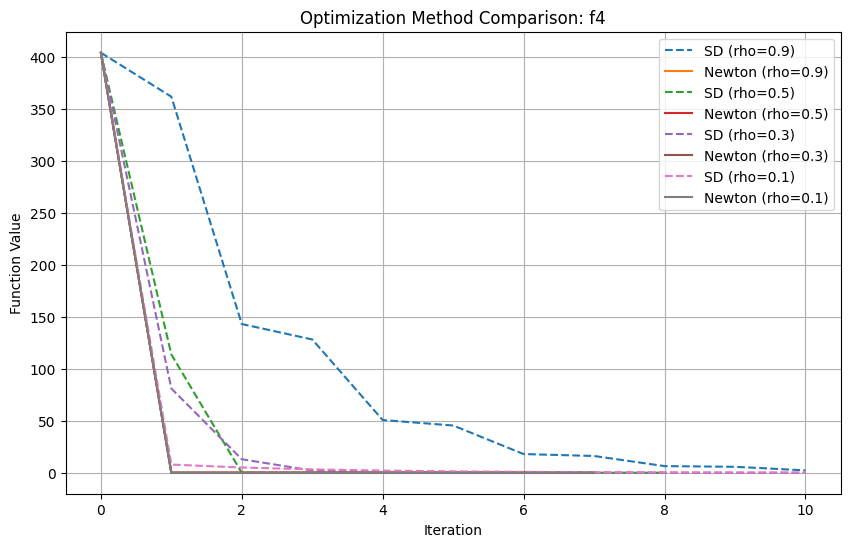

Testing function: f5
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [-2.53948729e-05  5.96379060e-01], Time: 0.01078 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [0.         0.02601229], Time: 0.00154 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [ 0.         -0.09781309], Time: 0.00282 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [0.         0.02601229], Time: 0.00153 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [0.1968     0.10722604], Time: 0.00140 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [0.         0.02601229], Time: 0.00165 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.3145728  0.11461291], Time: 0.00177 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [0.         0.02601229], Time: 0.00148 sec


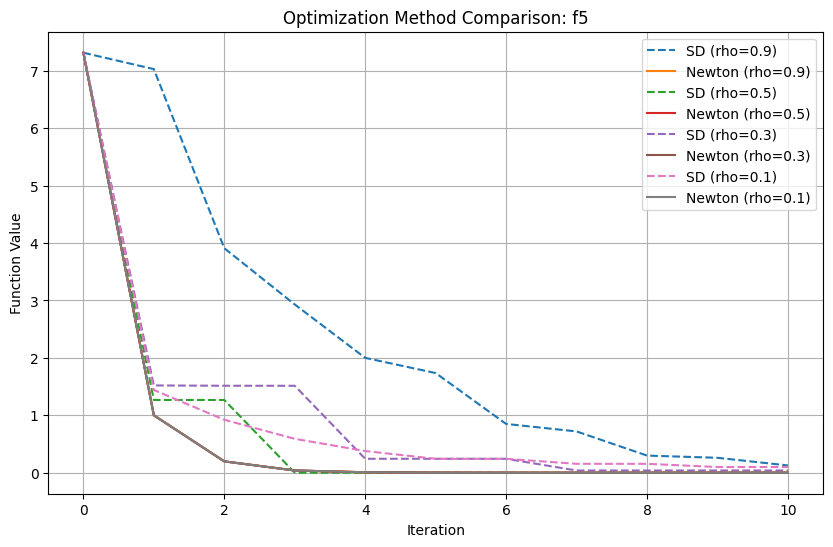

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time
from case_studies import *

def backtracking_line_search(f, grad_f, x, p, alpha=1.0, rho=0.5, c1=1e-4):
    while f(x + alpha * p) > f(x) + c1 * alpha * np.dot(grad_f(x), p):
        alpha *= rho
    return alpha

def steepest_descent(f, grad_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    start_time = time.time()
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
    end_time = time.time()
    
    print(f"Steepest Descent | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    return history

def newton_method(f, grad_f, hessian_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    start_time = time.time()
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian_f(x)
        try:
            p = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
    end_time = time.time()
    
    print(f"Newton Method | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    return history

def banchmark_protocol(functions, x0s, rho_values):
    i=0
    for f, df, Hf, name in functions:
        plt.figure(figsize=(10, 6))
        print(f"Testing function: {name}")
        for rho in rho_values:
            history_sd = steepest_descent(f, df, x0s[i], rho)
            plt.plot(range(len(history_sd)), history_sd, label=f"SD (rho={rho})", linestyle='--')
            
            history_newton = newton_method(f, df, Hf, x0s[i], rho)
            plt.plot(range(len(history_newton)), history_newton, label=f"Newton (rho={rho})")
        
        plt.xlabel("Iteration")
        plt.ylabel("Function Value")
        plt.title(f"Optimization Method Comparison: {name}")
        plt.legend()
        plt.grid()
        plt.savefig(f"h2-{name}") # Call fig.savefig before plt.show
        plt.show()
        i+=1

# Define test functions
functions = [
    (f1, df1, Hf1, "f1"),
    (f2, df2, Hf2, "f2"),
    (f3, df3, Hf3, "f3"),
    (f4, df4, Hf4, "f4"),
    (f5, df5, Hf5, "f5")
]

x0s = [
    np.array([10, 10]),
    np.array([-1.2, 1.0]),
    np.array([1, 1]),
    np.array([2, -2]),
    np.array([-1.5, 1.5])
]

# x0 = np.array([-1.0, 1.0])
rho_values = [0.9, 0.5, 0.3, 0.1]

banchmark_protocol(functions, x0s, rho_values)


上面的实验可以看出f3的Newton Method有迭代点停滞情况(stagnation)
下面的代码打印了每次迭代的时候df, Hf的value,可以看出是因为f3每次backtracking line search得到的alpha value都很小。

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import time
from case_studies import *

def backtracking_line_search(f, grad_f, x, p, alpha=1.0, rho=0.5, c1=1e-4):
    while f(x + alpha * p) > f(x) + c1 * alpha * np.dot(grad_f(x), p):
        alpha *= rho
    return alpha

def steepest_descent(f, grad_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    grad_norms = [np.linalg.norm(grad_f(x))]
    start_time = time.time()
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
        grad_norms.append(np.linalg.norm(grad))
        print(f"Iteration {iteration+1} | SD Gradient Norm: {grad_norms[-1]}, alpha:{alpha}")

    end_time = time.time()
    
    print(f"Steepest Descent | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    return history, grad_norms

def newton_method(f, grad_f, hessian_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    grad_norms = [np.linalg.norm(grad_f(x))]
    hess_norms = [np.linalg.norm(hessian_f(x))]
    start_time = time.time()
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian_f(x)
        try:
            p = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
        grad_norms.append(np.linalg.norm(grad))
        hess_norms.append(np.linalg.norm(hess))
        print(f"Iteration {iteration+1} | Newton Gradient Norm: {grad_norms[-1]}, Hessian Norm: {hess_norms[-1]}, alpha:{alpha}")
    end_time = time.time()
    
    print(f"Newton Method | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    return history, grad_norms, hess_norms

def benchmark_protocol(functions, x0s, rho_values):
    i = 0
    for f, df, Hf, name in functions:
        print(f"Testing function: {name}")
        for rho in rho_values:
            history_sd, grad_norms_sd = steepest_descent(f, df, x0s[i], rho)
            history_newton, grad_norms_newton, hess_norms_newton = newton_method(f, df, Hf, x0s[i], rho)
        i += 1

# Define test functions
functions = [
    (f1, df1, Hf1, "f1"),
    (f2, df2, Hf2, "f2"),
    (f3, df3, Hf3, "f3"),
    (f4, df4, Hf4, "f4"),
    (f5, df5, Hf5, "f5")
]

x0s = [
    np.array([10, 10]),
    np.array([-1.2, 1.0]),
    np.array([1e-5, -1e-5]),
    np.array([2, -2]),
    np.array([-1.5, 1.5])
]


rho_values = [0.9, 0.5, 0.3, 0.1]

benchmark_protocol(functions, x0s, rho_values)


Testing function: f1
Iteration 1 | SD Gradient Norm: 20000.0099999975, alpha:0.0009550049507968265
Iteration 2 | SD Gradient Norm: 18200.2089788235, alpha:0.0009550049507968265
Iteration 3 | SD Gradient Norm: 16562.372403545058, alpha:0.0009550049507968265
Iteration 4 | SD Gradient Norm: 15071.925094298751, alpha:0.0009550049507968265
Iteration 5 | SD Gradient Norm: 13715.603494659576, alpha:0.0009550049507968265
Iteration 6 | SD Gradient Norm: 12481.337638667163, alpha:0.0009550049507968265
Iteration 7 | SD Gradient Norm: 11358.14373966496, alpha:0.0009550049507968265
Iteration 8 | SD Gradient Norm: 10336.026445095751, alpha:0.0009550049507968265
Iteration 9 | SD Gradient Norm: 9405.889887414569, alpha:0.0009550049507968265
Iteration 10 | SD Gradient Norm: 8559.456739557172, alpha:0.0009550049507968265
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [9.81063234 3.89458492], Time: 0.04666 sec
Iteration 1 | Newton Gradient Norm: 20000.0099999975, Hessian Norm: 2000.00099999975, al

Testing function: f1
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [9.81063234 3.89458492], Time: 0.03907 sec
Newton Method | Iterations: 2, Rho: 0.9, Final x: [0. 0.], Time: 0.00233 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [9.8063952  6.18726348], Time: 0.00557 sec
Newton Method | Iterations: 2, Rho: 0.5, Final x: [0. 0.], Time: 0.00017 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [9.85515288e+00 4.06120376e-03], Time: 0.00358 sec
Newton Method | Iterations: 2, Rho: 0.3, Final x: [0. 0.], Time: 0.00014 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [9.98001799 1.07374182], Time: 0.00267 sec
Newton Method | Iterations: 2, Rho: 0.1, Final x: [0. 0.], Time: 0.00013 sec


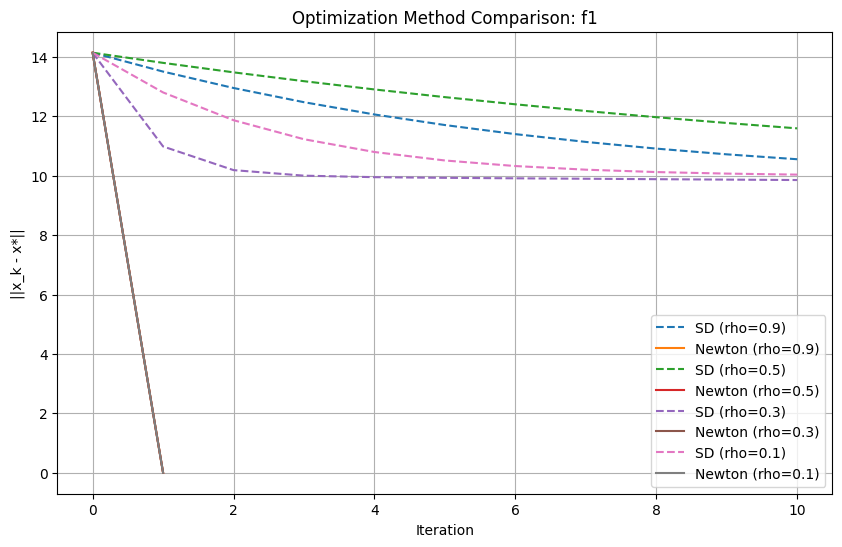

Testing function: f2
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [1.44785509 2.02225547], Time: 0.00541 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [0.47131197 0.1729609 ], Time: 0.00072 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [-1.01781085  1.03713659], Time: 0.00104 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [0.37974282 0.1181458 ], Time: 0.00043 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [-1.0195126   1.04227576], Time: 0.00082 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [0.31247395 0.07831726], Time: 0.00036 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [-0.84492637  0.72282178], Time: 0.00046 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [-0.06162324 -0.00663252], Time: 0.00042 sec


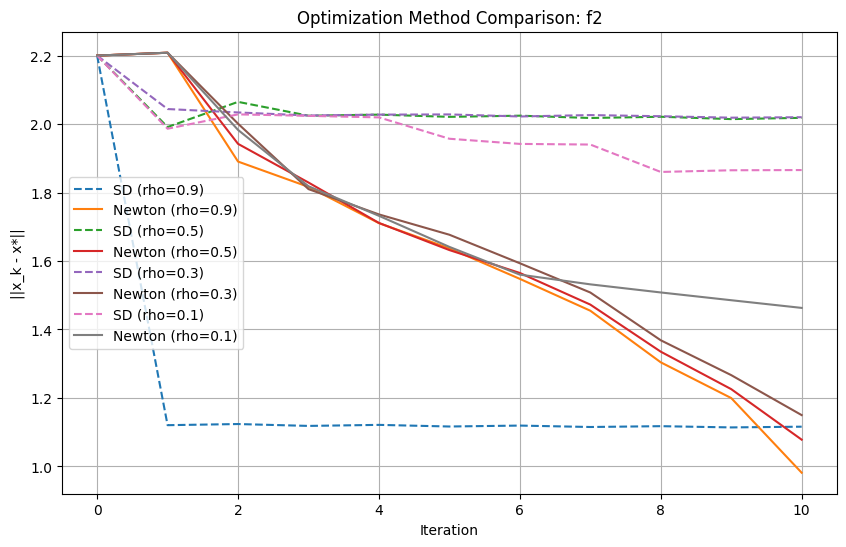

Testing function: f3
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [ 9.80238104e-06 -9.41468845e-06], Time: 0.10508 sec
Newton Method | Iterations: 3, Rho: 0.9, Final x: [ 1.61124334e-16 -1.61124334e-16], Time: 0.00053 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [ 9.74050712e-06 -3.07667177e-08], Time: 0.01812 sec
Newton Method | Iterations: 3, Rho: 0.5, Final x: [ 1.61124334e-16 -1.61124334e-16], Time: 0.00043 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [ 7.68375089e-06 -4.49041281e-09], Time: 0.00983 sec
Newton Method | Iterations: 3, Rho: 0.3, Final x: [ 1.61124334e-16 -1.61124334e-16], Time: 0.00043 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [ 9.80198341e-06 -9.80524647e-06], Time: 0.00543 sec
Newton Method | Iterations: 3, Rho: 0.1, Final x: [ 1.61124334e-16 -1.61124334e-16], Time: 0.00037 sec


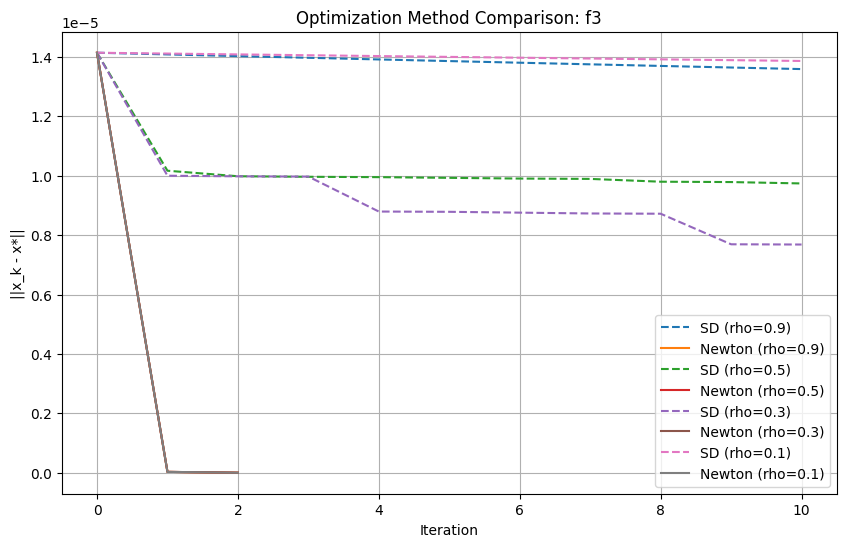

Testing function: f4
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [0.07473535 0.07473535], Time: 0.02008 sec
Newton Method | Iterations: 8, Rho: 0.9, Final x: [0.00190933 0.00190933], Time: 0.00222 sec
Steepest Descent | Iterations: 8, Rho: 0.5, Final x: [0.00190938 0.00190938], Time: 0.00329 sec
Newton Method | Iterations: 8, Rho: 0.5, Final x: [0.00190933 0.00190933], Time: 0.00227 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [0.00190785 0.00190785], Time: 0.00334 sec
Newton Method | Iterations: 8, Rho: 0.3, Final x: [0.00190933 0.00190933], Time: 0.00228 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.10737418 0.10737418], Time: 0.00304 sec
Newton Method | Iterations: 8, Rho: 0.1, Final x: [0.00190933 0.00190933], Time: 0.00230 sec


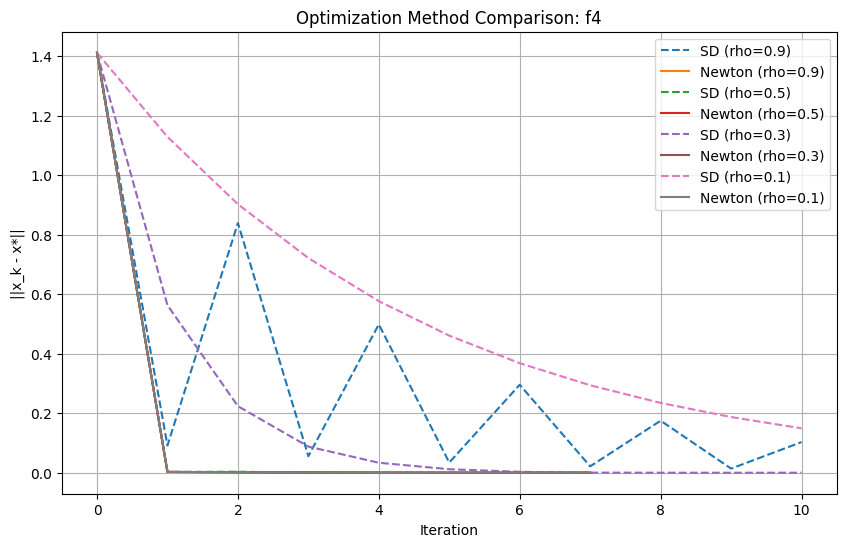

Testing function: f5
Steepest Descent | Iterations: 10, Rho: 0.9, Final x: [-2.53948729e-05  5.96379060e-01], Time: 0.00607 sec
Newton Method | Iterations: 10, Rho: 0.9, Final x: [0.         0.02601229], Time: 0.00117 sec
Steepest Descent | Iterations: 10, Rho: 0.5, Final x: [ 0.         -0.09781309], Time: 0.00111 sec
Newton Method | Iterations: 10, Rho: 0.5, Final x: [0.         0.02601229], Time: 0.00113 sec
Steepest Descent | Iterations: 10, Rho: 0.3, Final x: [0.1968     0.10722604], Time: 0.00105 sec
Newton Method | Iterations: 10, Rho: 0.3, Final x: [0.         0.02601229], Time: 0.00116 sec
Steepest Descent | Iterations: 10, Rho: 0.1, Final x: [0.3145728  0.11461291], Time: 0.00125 sec
Newton Method | Iterations: 10, Rho: 0.1, Final x: [0.         0.02601229], Time: 0.00112 sec


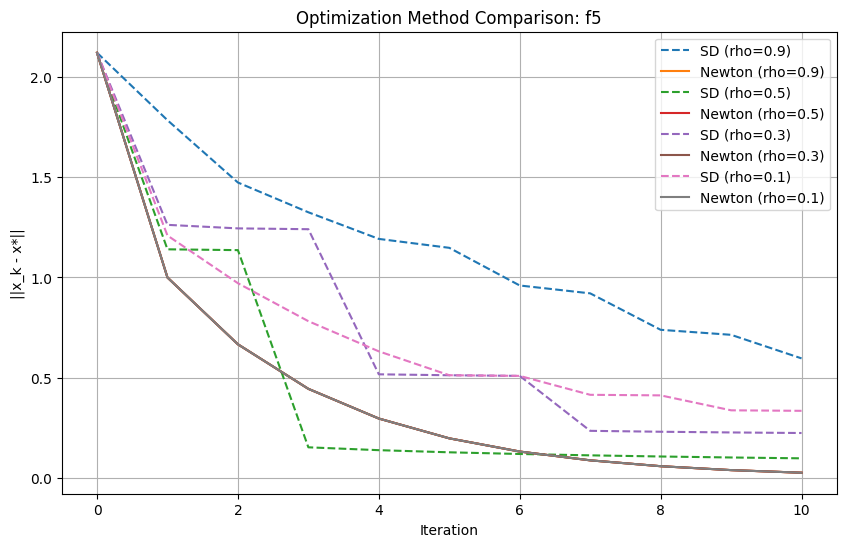

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import time
from case_studies import *

def backtracking_line_search(f, grad_f, x, p, alpha=1.0, rho=0.5, c1=1e-4):
    while f(x + alpha * p) > f(x) + c1 * alpha * np.dot(grad_f(x), p):
        alpha *= rho
    return alpha

def steepest_descent(f, grad_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    iterates = [x.copy()]  # Store iterates x_k
    start_time = time.time()
    
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
        iterates.append(x.copy())  # Store x_k at each step
    
    end_time = time.time()
    print(f"Steepest Descent | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    
    return history, iterates  # Return both function values and iterates

def newton_method(f, grad_f, hessian_f, x0, rho, tol=1e-6, max_iter=10):
    x = x0
    history = [f(x)]
    iterates = [x.copy()]  # Store iterates x_k
    start_time = time.time()
    
    for iteration in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            break
        hess = hessian_f(x)
        try:
            p = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            p = -grad
        alpha = backtracking_line_search(f, grad_f, x, p, rho=rho)
        x = x + alpha * p
        history.append(f(x))
        iterates.append(x.copy())  # Store x_k at each step
        
    end_time = time.time()
    print(f"Newton Method | Iterations: {iteration+1}, Rho: {rho}, Final x: {x}, Time: {end_time - start_time:.5f} sec")
    
    return history, iterates  # Return both function values and iterates

def benchmark_protocol(functions, x0s, rho_values):
    for i, (f, df, Hf, name) in enumerate(functions):
        plt.figure(figsize=(10, 6))
        print(f"Testing function: {name}")
        
        opt = x_opt(name, len(x0s[i]))  # Get true minimum x*
        
        for rho in rho_values:
            # Run Steepest Descent
            history_sd, iterates_sd = steepest_descent(f, df, x0s[i], rho)
            distance_to_optimum_sd = [np.linalg.norm(x - opt) for x in iterates_sd]  # Compute ||x_k - x*||

            plt.plot(range(len(distance_to_optimum_sd)), distance_to_optimum_sd, label=f"SD (rho={rho})", linestyle='--')
            
            # Run Newton's Method
            history_newton, iterates_newton = newton_method(f, df, Hf, x0s[i], rho)
            distance_to_optimum_newton = [np.linalg.norm(x - opt) for x in iterates_newton]  # Compute ||x_k - x*||

            plt.plot(range(len(distance_to_optimum_newton)), distance_to_optimum_newton, label=f"Newton (rho={rho})")
        
        plt.xlabel("Iteration")
        plt.ylabel("||x_k - x*||")  # Distance to optimum
        plt.title(f"Optimization Method Comparison: {name}")
        plt.legend()
        plt.grid()
        plt.savefig(f"{name}")  # Save before showing the figure
        plt.show()


# Define test functions
functions = [
    (f1, df1, Hf1, "f1"),
    (f2, df2, Hf2, "f2"),
    (f3, df3, Hf3, "f3"),
    (f4, df4, Hf4, "f4"),
    (f5, df5, Hf5, "f5")
]

x0s = [
    np.array([10, 10]),
    np.array([-1.2, 1.0]),
    np.array([1e-5, -1e-5]),
    np.array([1, 1]),
    np.array([-1.5, 1.5])
]

rho_values = [0.9, 0.5, 0.3, 0.1]

benchmark_protocol(functions, x0s, rho_values)
